# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Austin Rivard
### Preferred Name (if different):
### Student ID: 015044445
### Email address: austin.rivard@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
#1. Load the dataset
filename = 'Concrete_Data_Yeh.csv'
df = pd.read_csv(filename)

In [4]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


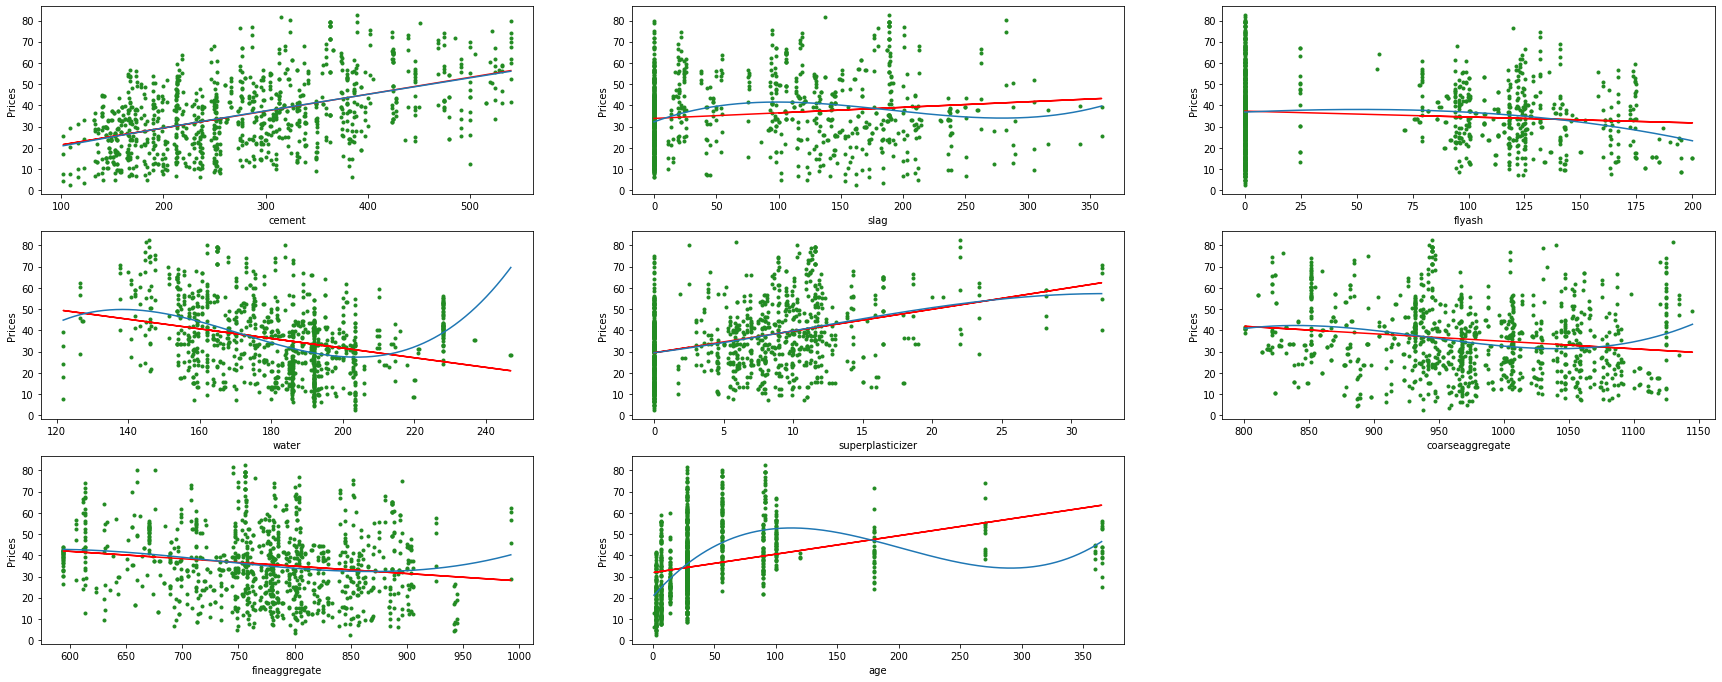

In [6]:
# 2. Plot all independent variables vs. the dependent variable

plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = df[col].to_numpy()
    y = df['csMPa'].to_numpy()
    plt.plot(x, y, '.', color="forestgreen")
    
    # plot linear regression line:
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, 'r')
    
    # also plot polynomial regression curve:
    degree = 3
    coeffs = np.polyfit(x, y, degree) 
    new_x = np.linspace(min(x), max(x), len(x))
    new_y = np.poly1d(coeffs)(new_x)
    plt.plot(new_x, new_y)
    
    plt.xlabel(col)
    plt.ylabel('Prices')

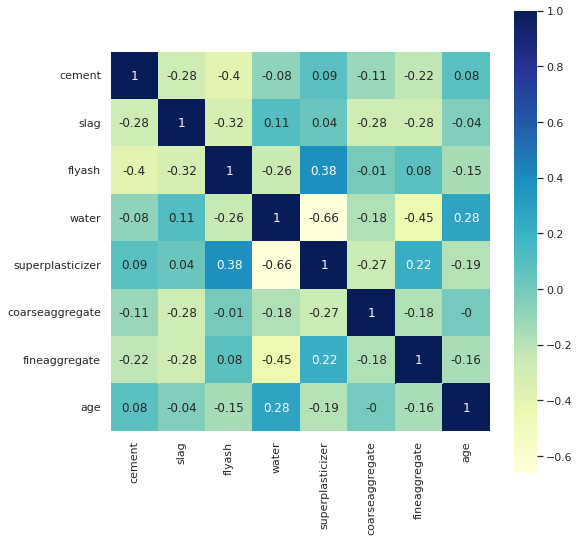

In [7]:
# 3. Compute and plot a correlation matrix between the independent variables

sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df.iloc[:, :8].corr().round(2),
            square=True,
            cmap='YlGnBu',
            annot=True)

In [8]:
# 4. Break the data into the training and test datasets

X = df.iloc[:, :8]  # all samples, all features except for csMPa
Y = df.iloc[:, 8]   # all samples, just csMPa

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

In [9]:
# 5. Train a linear regression model to predict the output/dependent variable

model = linear_model.LinearRegression().fit(X_train, Y_train)

In [10]:
# 6. Report (print out) the mean squared error and coefficient of determination

# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
  0.02248514  0.11520355]
Mean squared error: 95.62
Coefficient of determination: 0.64


Text(0, 0.5, 'Actual csMPa')

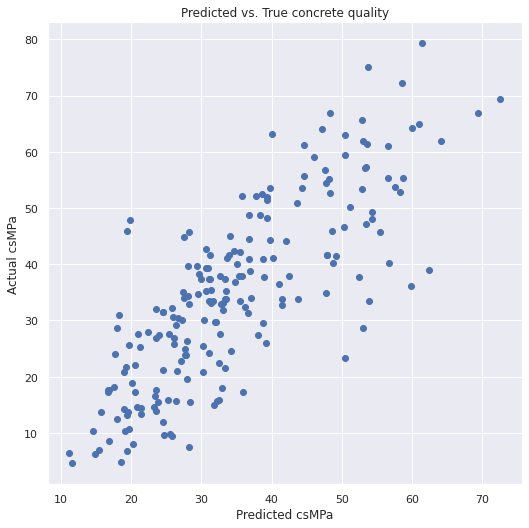

In [11]:
# 7. Plot the predicted vs. actual csMPa values

plt.scatter(Y_test_pred, Y_test)
plt.title('Predicted vs. True concrete quality')
plt.xlabel('Predicted csMPa')
plt.ylabel('Actual csMPa')

In [12]:
# Bonus: Improve results by using polynomial regression

from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly.fit(X_train_poly, Y_train)
model = linear_model.LinearRegression().fit(X_train_poly, Y_train)

Y_test_pred = model.predict(X_test_poly)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 51.12
Coefficient of determination: 0.81


Text(0, 0.5, 'Actual csMPa')

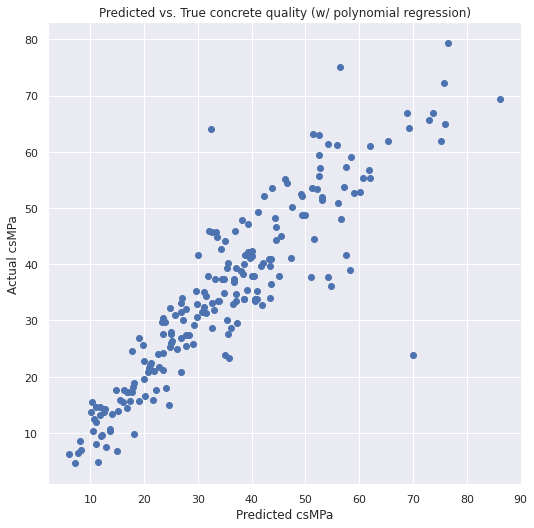

In [13]:
plt.scatter(Y_test_pred, Y_test)
plt.title('Predicted vs. True concrete quality (w/ polynomial regression)')
plt.xlabel('Predicted csMPa')
plt.ylabel('Actual csMPa')